## PREDICTION DU COURS DE CLOTURE DE L'OR SUR ETF - MODELE ARIMA

In [105]:
import pandas as pd
import numpy as np
import pingouin as pg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings
warnings.filterwarnings('ignore')

## Chargement du jeu de données

In [20]:
data = pd.read_csv("FINAL_USO.csv", parse_dates=[0], index_col='Date')

In [21]:
df = data.copy()
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


## Visualisation du cours de cloture ajusté de l'or

In [22]:
y = df['Adj Close']

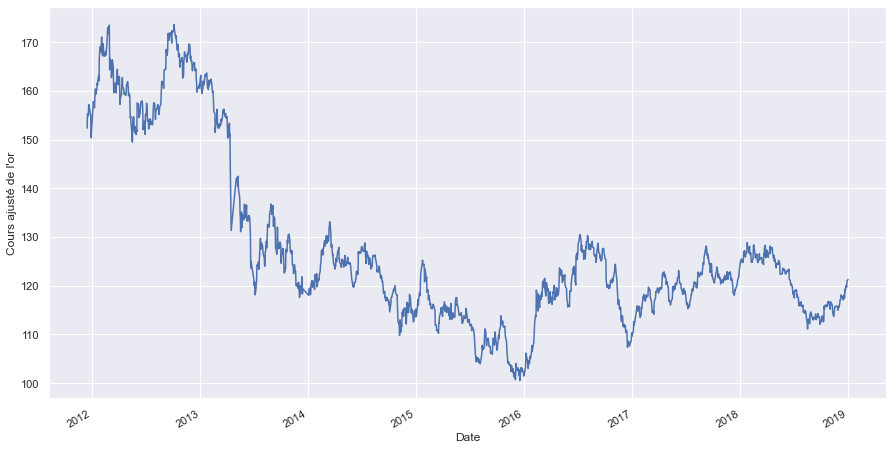

In [23]:
plt.figure(figsize=(15,8))
sns.set(style='darkgrid')
y.plot(grid=True)
plt.ylabel("Cours ajusté de l'or")
plt.show()

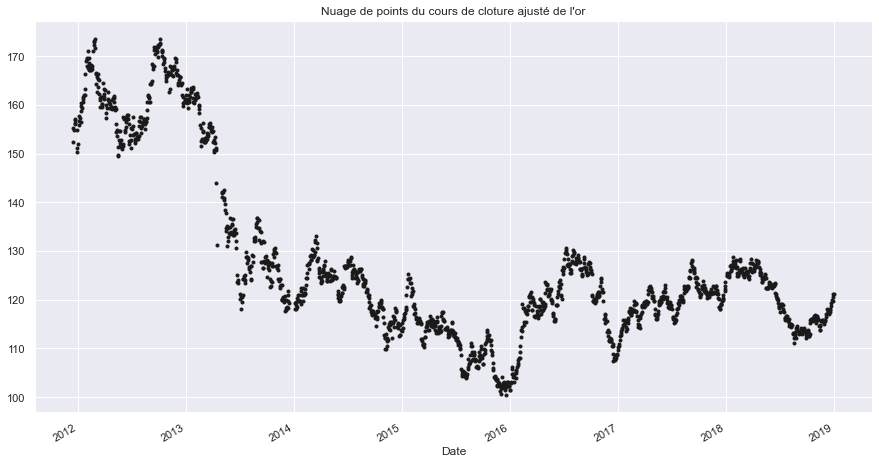

In [24]:
## Nuage de points
plt.figure(figsize=(15,8))
sns.set(style='darkgrid')
y.plot(grid=True, style='k.')
plt.title("Nuage de points du cours de cloture ajusté de l'or")
plt.show()

## VERIFICATION DE LA STATIONNARITE DE LA SERIE

L'analyse des séries chronologiques ne fonctionnant qu'avec les données stationnaires, il nous faut vérifier si la série est stationnaire ou pas. Une série stationnaire est une série à tendance constante. C'est une série dont l'évolution de la moyenne et l'écart type est constante.

### Vérification de la stationnarité de la série à l'aide du test ADF (Augmented Dickey-Fuller) ou encore test de Dickey-Fuller augmenté

En statistique et en économétrie,un test de Dickey-Fuller augmenté (ADF) teste l’hypothèse nulle qu’une racine unitaire est présente dans un échantillon de série chronologique. L’hypothèse alternative est différente selon la version du test utilisé, mais est généralement la stationarité.

H0 : La série a une racine unitaire (valeur de a=1).
H1 ou H alternative : La série est stationnaire. 


L'hypothèse alternative, c'est à dire celle de la stationnarité est accepté si la p-value est inférieure à 0.05 et que les statistiques de test ADF sont inférieures aux valeurs critiques.

In [25]:
from statsmodels.tsa.stattools import adfuller

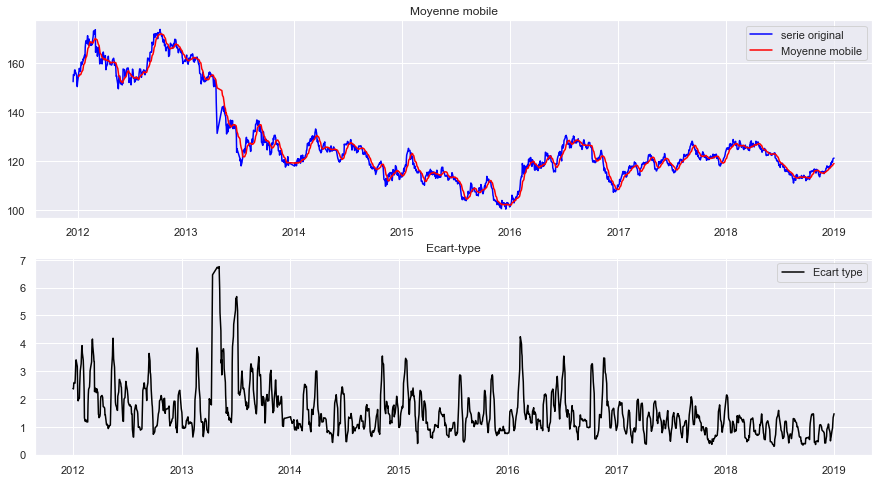

Resultats du test Dickey-Fuller augmenté : 
Test Statistiques               -1.823460
p-value                          0.368878
No. de décalage utilisé          1.000000
No. observations utilisées    1716.000000
valeur critique (1%)            -3.434166
valeur critique (5%)            -2.863226
valeur critique (10%)           -2.567667
dtype: float64


In [27]:
#Test de stationnarité
def test_stationarity(y):
    #Determation de la moyenne mobile et de l'écart type
    rolmean = y.rolling(12).mean()
    rolstd = y.rolling(12).std()
    
    
    #Plot rolling statistics:
    plt.figure(figsize=(15,8))
    
    plt.subplot(211)
    plt.plot(y, color='blue',label='serie original')
    plt.plot(rolmean, color='red', label='Moyenne mobile')
    plt.legend(loc='best')
    plt.title('Moyenne mobile')
    
    plt.subplot(212)
    plt.plot(rolstd, color='black', label = 'Ecart type')
    plt.legend(loc='best')
    plt.title('Ecart-type')
    plt.show(block=False)
    
    print("Resultats du test Dickey-Fuller augmenté : ")
    #Le autolag='AIC' choisira le nombre de décalages qui donne le plus faible AIC.
    adft = adfuller(y,autolag='AIC')
    
    # sortie pour dft nous donnera sans définir quelles sont les valeurs.
    # par conséquent, nous écrivons manuellement quelles valeurs il explique en utilisant une boucle for
    
    output = pd.Series(adft[0:4],index=['Test Statistiques','p-value','No. de décalage utilisé','No. observations utilisées'])
    for key,values in adft[4].items():
        output['valeur critique (%s)'%key] =  values
    print(output)
    
test_stationarity(y)

On observe ici que la moyenne et l'écart type décroit. Par conséquent notre série n'est pas stationnaire.
De plus, notre p-value est supérieure au niveau de signification de 0.05 donc nous ne pouvons pas rejeter l'hypothèse nulle. En plus, les statistiques de test sont supérieures aux valeurs critiques. On en conclue que les données ne sont donc pas stationnaire. 

Nous allons donc procéder à la déconposition de la série et à la réduction des fluctuations et de la tendance à la baisse dans la série. Séparons donc la saisonnalié et la tendance de la série.

## DECOMPOSITION DE LA SERIE CHRONOLOGIQUE

Il s'agit ici de faire ressortir les différentes composantes de la série chronologique : la tendance cyclique, la saisonnalité et les résidus.

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

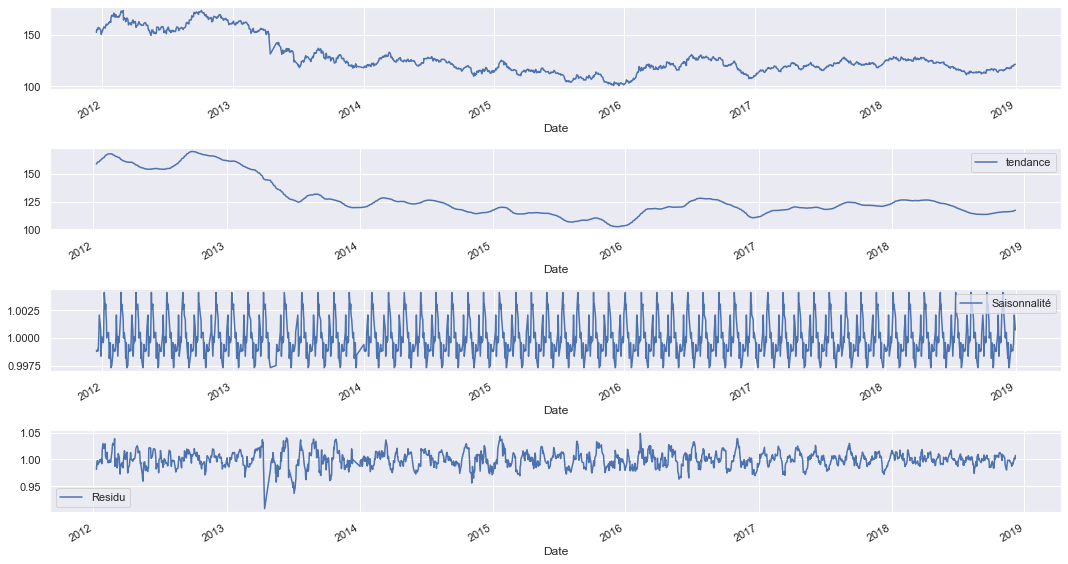

In [29]:
decomposition = seasonal_decompose(y, model='multiplicative',period=30)

tendance = decomposition.trend
saisonnalite = decomposition.seasonal
residu = decomposition.resid

plt.figure(figsize=(15,8))
plt.subplot(411)
y.plot(kind="line",label='Serie chronologique originale')

plt.subplot(412)
tendance.plot(kind="line",label='tendance')
plt.legend(loc='best')

plt.subplot(413)
saisonnalite.plot(kind="line",label='Saisonnalité')
plt.legend(loc='best')

plt.subplot(414)
residu.plot(kind="line",label='Residu')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

Les trois composantes sont représentées dans les trois panneau inférieur du diagramme. Ces composants peuvent etre ajoutées ensemble pour reconstruire les données ajoutées dans le panneau supérieur. Notez que la composante saisonnière change lentement au fil du temps, de sorte que deux mois consécutives ont des tendances similaires. La composante restante indiquée dans le panneau inférieur est ce qui reste lorsque les composantes saisonnières et tendance-cycle ont été soustraites des données.

----------------------------------------------------------------------------------------------------------------------------------

<ul>
<li>Dans ce qui suit nous appliquons le logarithme sur les données de la série afin de réduire l’ampleur des valeurs et réduire la tendance à la baisse dans la série.</li>
<li>Ensuite, nous trouvons la moyenne mobile de la série. Une moyenne mobile est calculée en prenant des données pour les 12 derniers mois et en donnant une valeur de consommation moyenne à chaque point plus en avance dans la série.</li>
</ul>

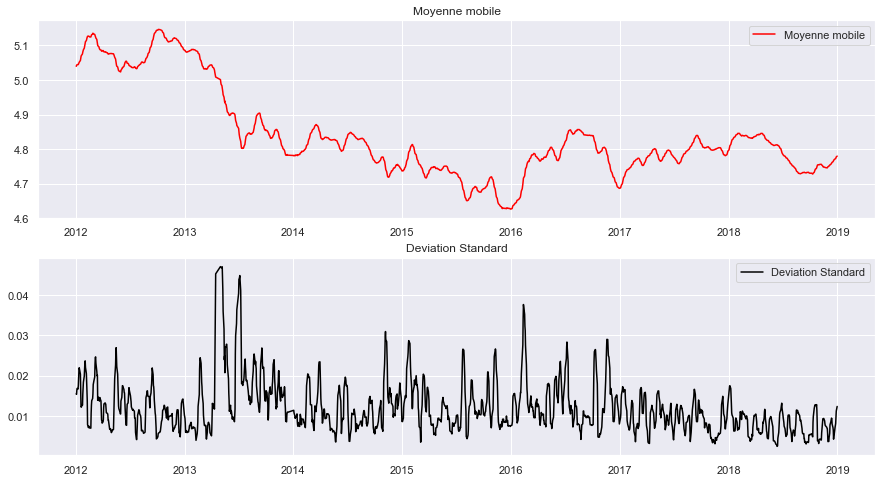

In [13]:
y_log = np.log(y)
Moy_mobile = y_log.rolling(12).mean()
std_dev = y_log.rolling(12).std()

plt.figure(figsize=(15,8))

plt.subplot(211)
plt.plot(Moy_mobile, color='red', label='Moyenne mobile')
plt.legend(loc='best')
plt.title('Moyenne mobile')
    
plt.subplot(212)
plt.plot(std_dev, color='black', label = 'Deviation Standard')
plt.legend(loc='best')
plt.title('Deviation Standard')
plt.show()

    

Nous pouvons maintenant appliquer le modèle ARIMA pour la prédiction du cours ajusté de l'or.

## Modèle ARIMA (AutoRegressive Integrated Moving Average)

### Divisons notre DataSet en Train - Test

In [14]:
y_train, y_test = y_log[:int(len(y_log)*0.7)], y_log[int(len(y_log)*0.7):] 

In [15]:
### Vérification de la taille des échantillons
print(y_log.shape)

print(y_train.shape)
print(y_test.shape)

(1718,)
(1202,)
(516,)


### Visualisation Train et Test

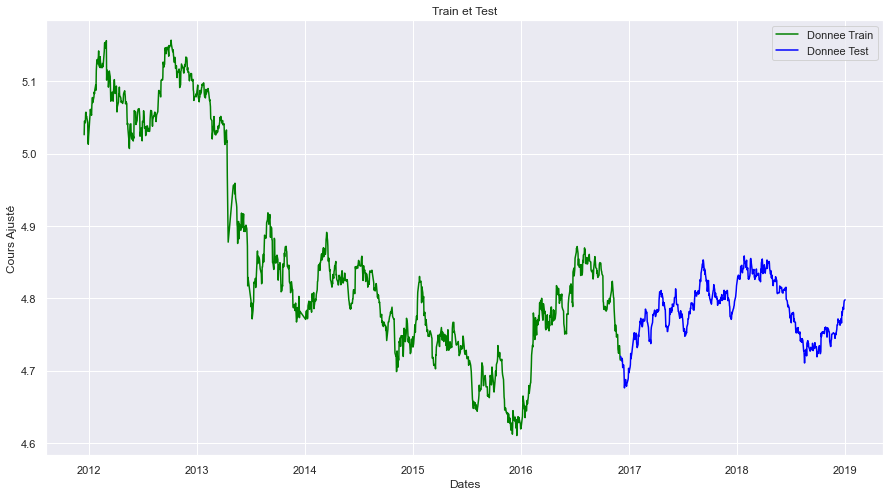

In [16]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Cours Ajusté')
plt.plot(y_train, 'green', label='Donnee Train')
plt.plot(y_test, 'blue', label='Donnee Test')
plt.legend()
plt.title('Train et Test')
plt.show()

### Choix des paramètres p, d et q pour le modèle ARIMA 

### Déterminons l'ordre de différentition d pour rendre la série stationnaire

Le but ici est de rendre la série stationnaire avant l'utilisation du modèle ARIMA pour la prévision et pour ce faire, nous utiliserons l'ordre de différentition "d" qui est le nombre minimum de différentiations nécessaires pour rendre la série stationnaire. Et si notre série était stationnaire alors ce ordre serait égale à 0.

Faisons la différence entre la série et voyons à quoi ressemble le diagramme d'autocorrélation.

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [49]:
type(y_log)

pandas.core.series.Series

In [55]:
df2 = pd.read_csv("FINAL_USO.csv")

In [59]:
df2_log = pd.DataFrame(np.log(df2['Adj Close']))
df2_log.head()

,Adj Close
0,5.026049
1,5.044908
2,5.042586
3,5.056118
4,5.057264


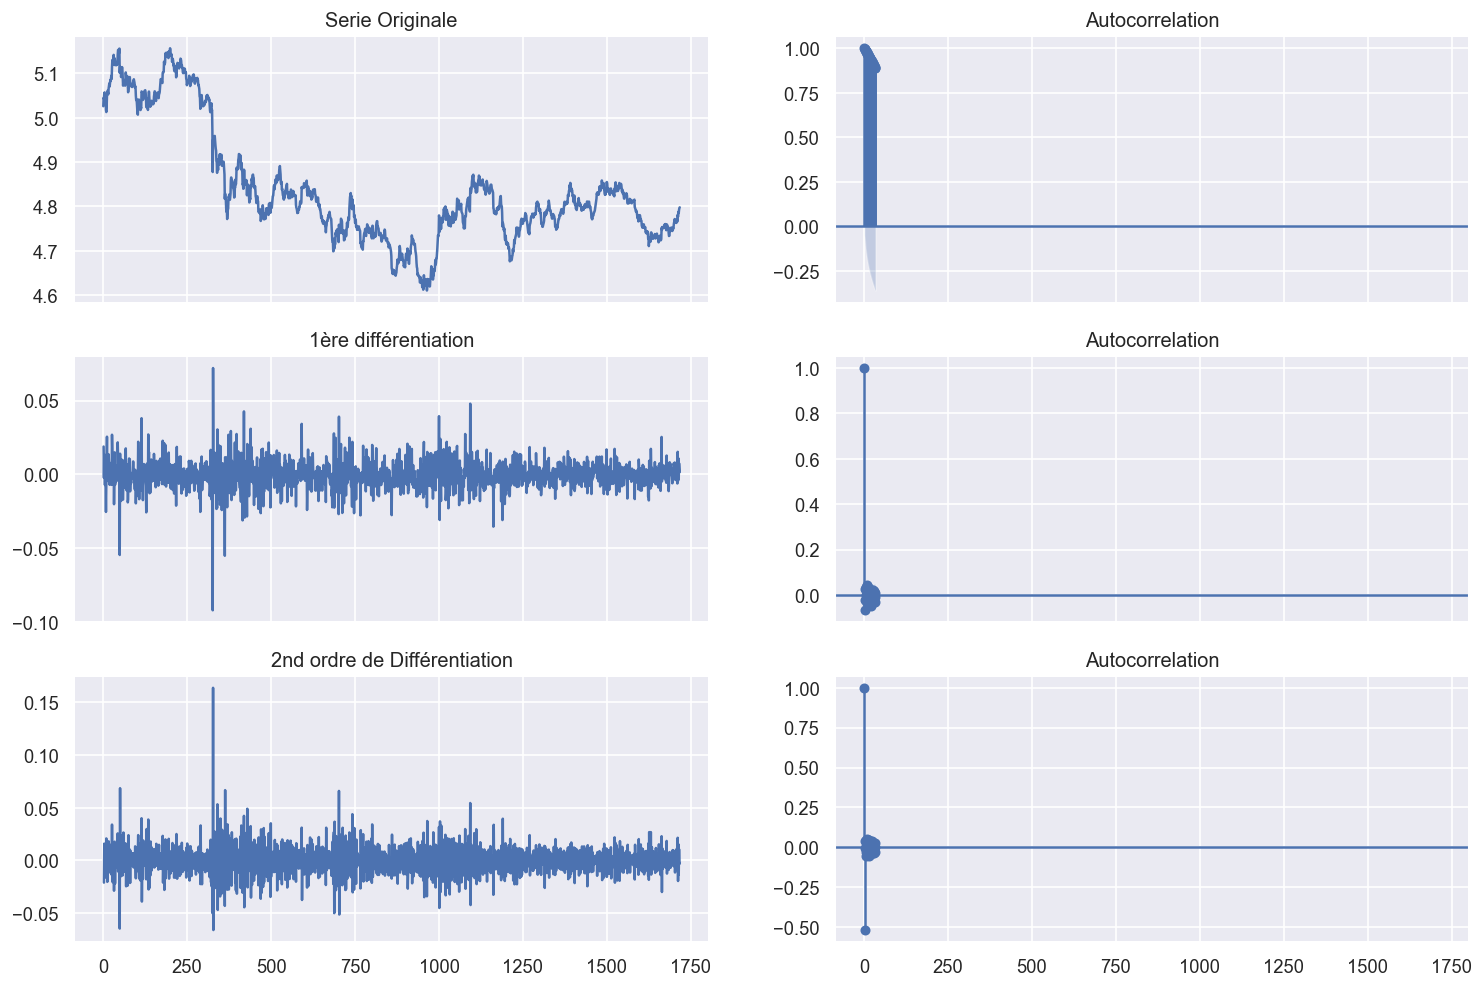

In [60]:
#plt.figure(figsize=(15,8))
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

# Serie Originale
fig, axes = plt.subplots(3, 2, sharex=True)

axes[0, 0].plot(df2_log.values); 
axes[0, 0].set_title('Serie Originale')
plot_acf(df2_log, ax=axes[0, 1])

# 1ère différentiation
axes[1, 0].plot(df2_log.diff()); 
axes[1, 0].set_title('1ère différentiation')
plot_acf(df2_log.diff().dropna(), ax=axes[1, 1])

# 2nd Différentiation
axes[2, 0].plot(df2_log.diff().diff()); 
axes[2, 0].set_title('2nd ordre de Différentiation')
plot_acf(df2_log.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

<ul>
<li>Au niveau du premier axe, on remarque que avant différentiation, la série n'est pas stationnaire. L’ACF ci-dessus est « en décomposition », ou diminue, très lentement, et reste bien au-dessus de la plage de signification (lignes bleues). Ceci est révélateur d’une série non stationnaire.
</li>
<li>
    Lorsqu'on applique les ordres de différentiations et mesurons l'autocorrélation, on constate que la série se stabilise (devient stationnaire) dès le 1er ordre de différentiation. 
</li>
<li>    
    ici on peut voir que la série atteint la stationnarité avec deux ordres de différentiation. Mais en regardant le diagramme d’autocorrélation pour la 2ème différenciation, le décalage va dans la zone très négative assez rapidement, ce qui indique que la série aurait pu être trop différente.
</li>
<li>
    <strong>Il me convient ici de fixer l'ordre de différentiation à 1 (d=1).</strong>
</li>
</ul>

### Déterminons l'ordre p du AR c à d le nombre de décalages

La détermination du nombre p du AR peut se faire en inspectant le PACF (Partial Autocorrelation ou tracé d'autocorrélation partielle). Le PACF mesure la corrélation qu’a un décalage de la série, le niveau de corrélation entre un décalage et la serie. 

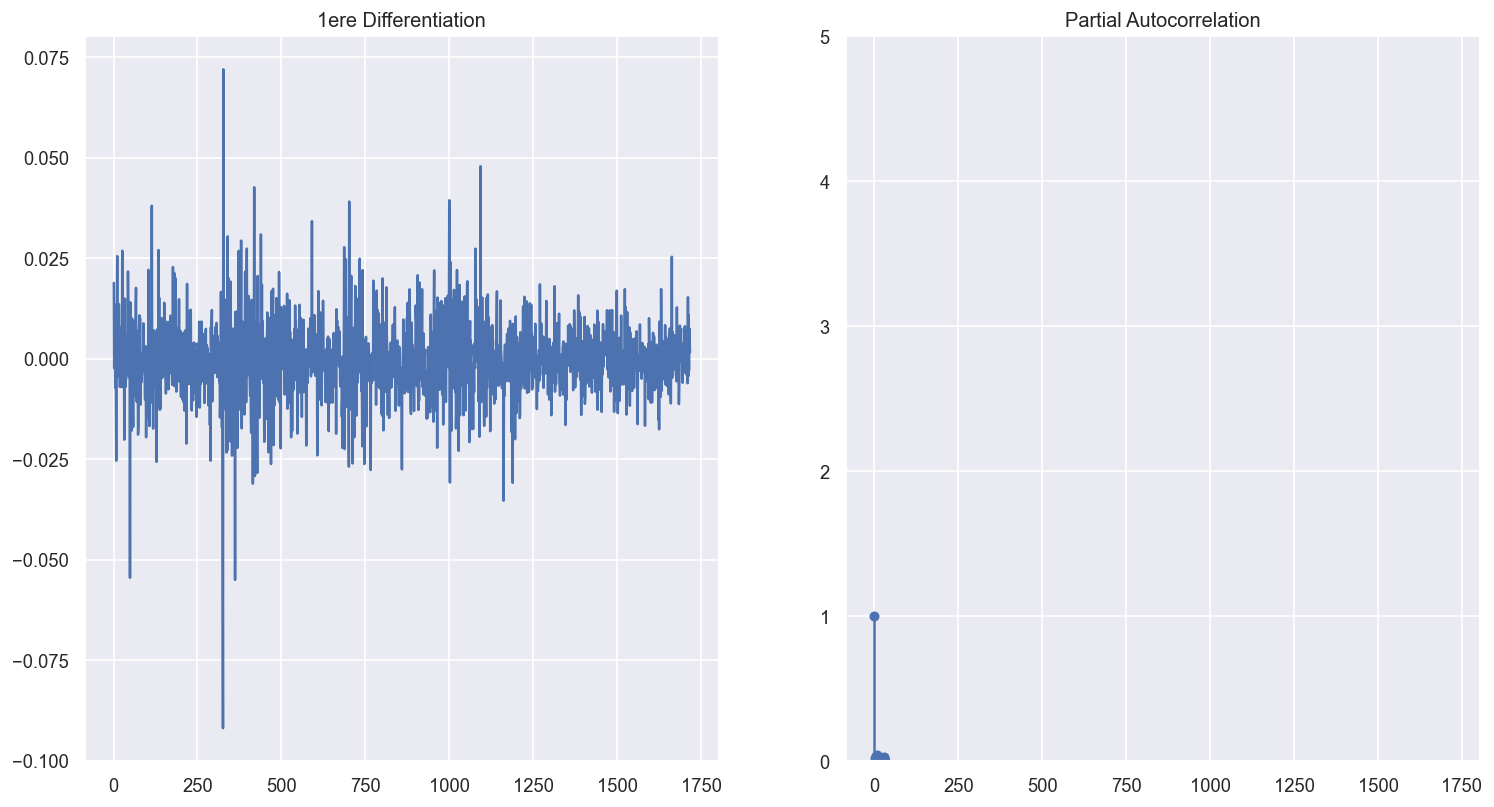

In [64]:
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df2_log.diff()); 
axes[0].set_title('1ere Differentiation')
axes[1].set(ylim=(0,5))
plot_pacf(df2_log.diff().dropna(), ax=axes[1])

plt.show()

En observant le graphique, nous pouvons constater que la première valeur de décalage est statistiquement significative, alors que les autocorrélations partielles pour tous les autres décalages ne sont pas statistiquement significatives. Cela suggère un modèle AR(1) c'est à dire à l'ordre p=1 est possible pour ces données.

### Déterminons l'ordre q du MA c à d le nombre de prévisions décalées

Ici nous allons utiliser l'ACF pour identifier le nombre de terme MA. L’ACF indique combien de termes MA sont nécessaires pour supprimer toute autocorrélation dans la série stationnaire.

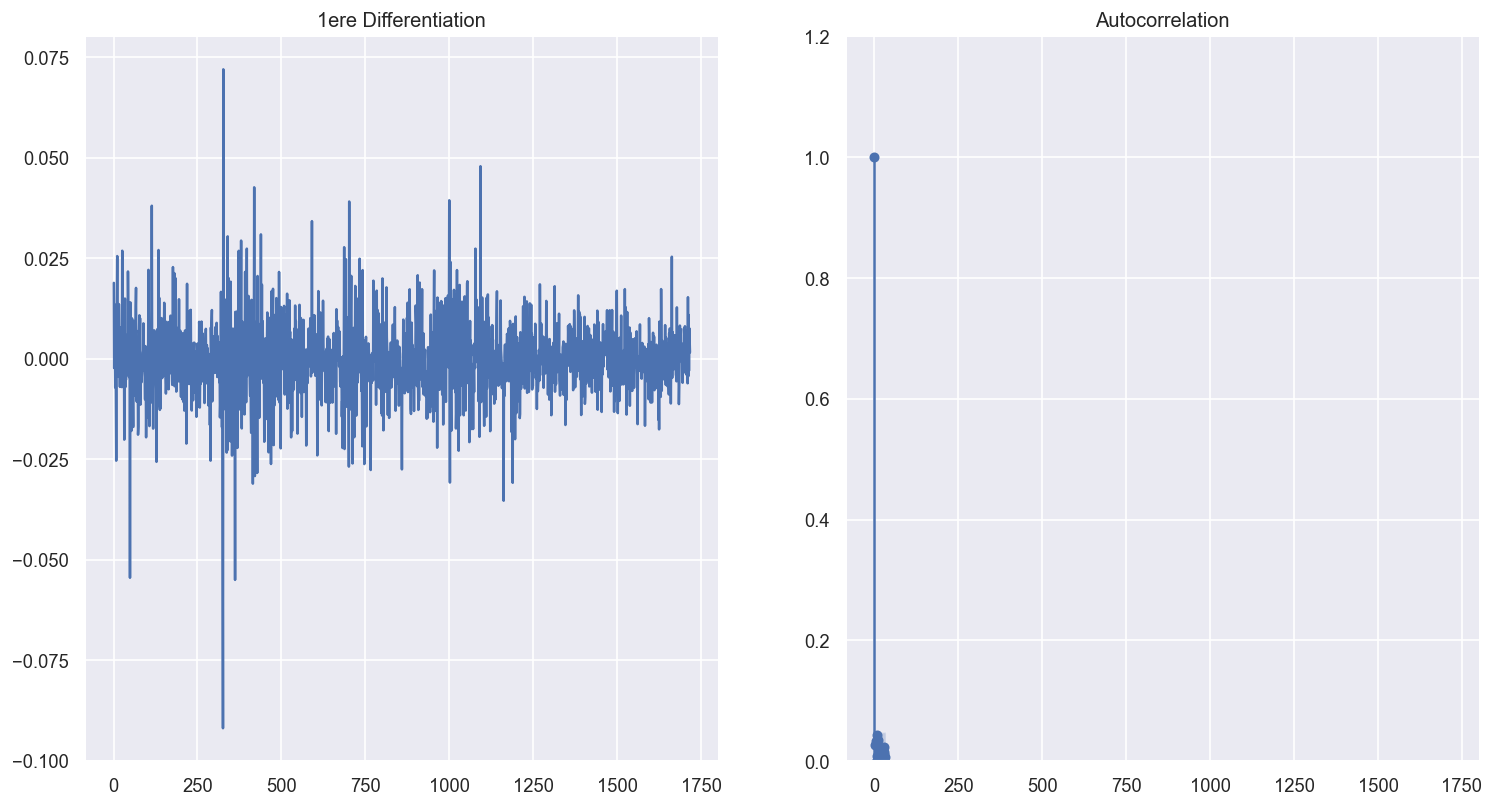

In [66]:
# 1ère différentiation
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df2_log.diff()); 
axes[0].set_title('1ere Differentiation')
axes[1].set(ylim=(0,1.2))
plot_acf(df2_log.diff().dropna(), ax=axes[1])

plt.show()

la première autocorrélation de décalage est statistiquement significative alors que toutes les autocorrélations suivantes ne le sont pas. Cela suggère un modèle MA(1) (q=1) possible pour les données.

### Construisons maintenant un modèle ARIMA sur les données

Les paramètres du modèles ARIMA (d, p et q) étant déterminés, adptons cela au modèle ARIMA. 

In [68]:
from statsmodels.tsa.arima_model import ARIMA

In [81]:
# 1,1,1 ARIMA Model
model_arima = ARIMA(y_train, order=(1,1,1))
model_fit = model_arima.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1201
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3742.144
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 02 Oct 2021   AIC                          -7476.288
Time:                        17:38:32   BIC                          -7455.924
Sample:                             1   HQIC                         -7468.618
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0003      0.000     -0.933      0.351      -0.001       0.000
ar.L1.D.Adj Close     0.2403      0.251      0.957      0.339      -0.252       0.733
ma.L1.D.Adj Close    -0.

<ul>
<li>H0 : Chaque coefficient n'est pas statistiquement significative.</li>
<li>H1 : L'hypothèse alternative.</li>
<li>Ici nous constatons que les p-value des termes AR1 et MA1 ne sont pas inférieurs à 0.05 ce qui implique l'acceptation de l'hypothèse nulle.</li>
</ul>

Traçons les résidus pour nous assurer qu’il n’y a pas de modèles (c’est-à-dire recherchez une moyenne et une variance constantes).

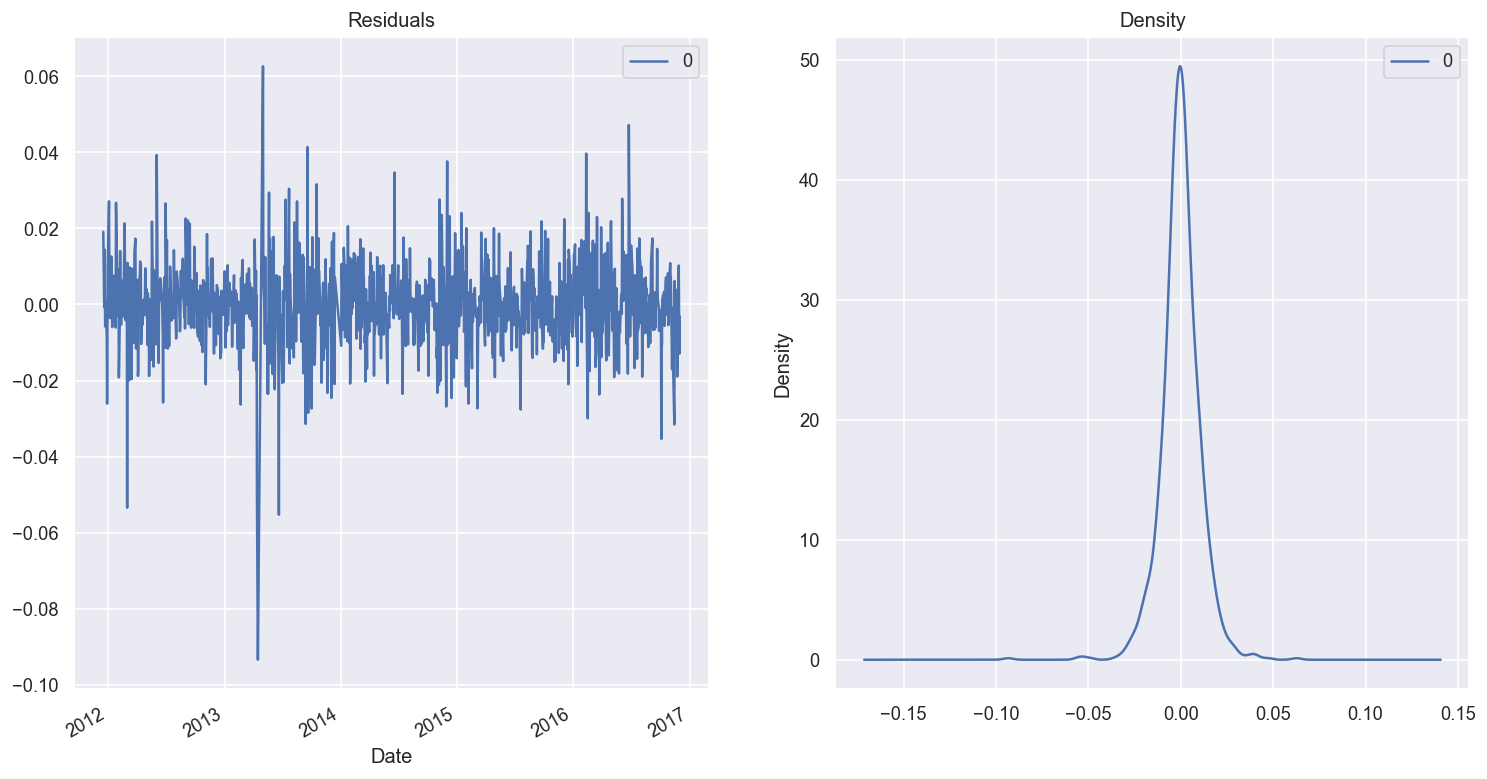

In [86]:
# Visualisons les erreurs résiduelles
plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':120})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Les erreurs résiduelles semblent correctes avec une moyenne proche de zéro et une variance uniforme. Traçons les valeurs réelles par rapport aux valeurs ajustées. 

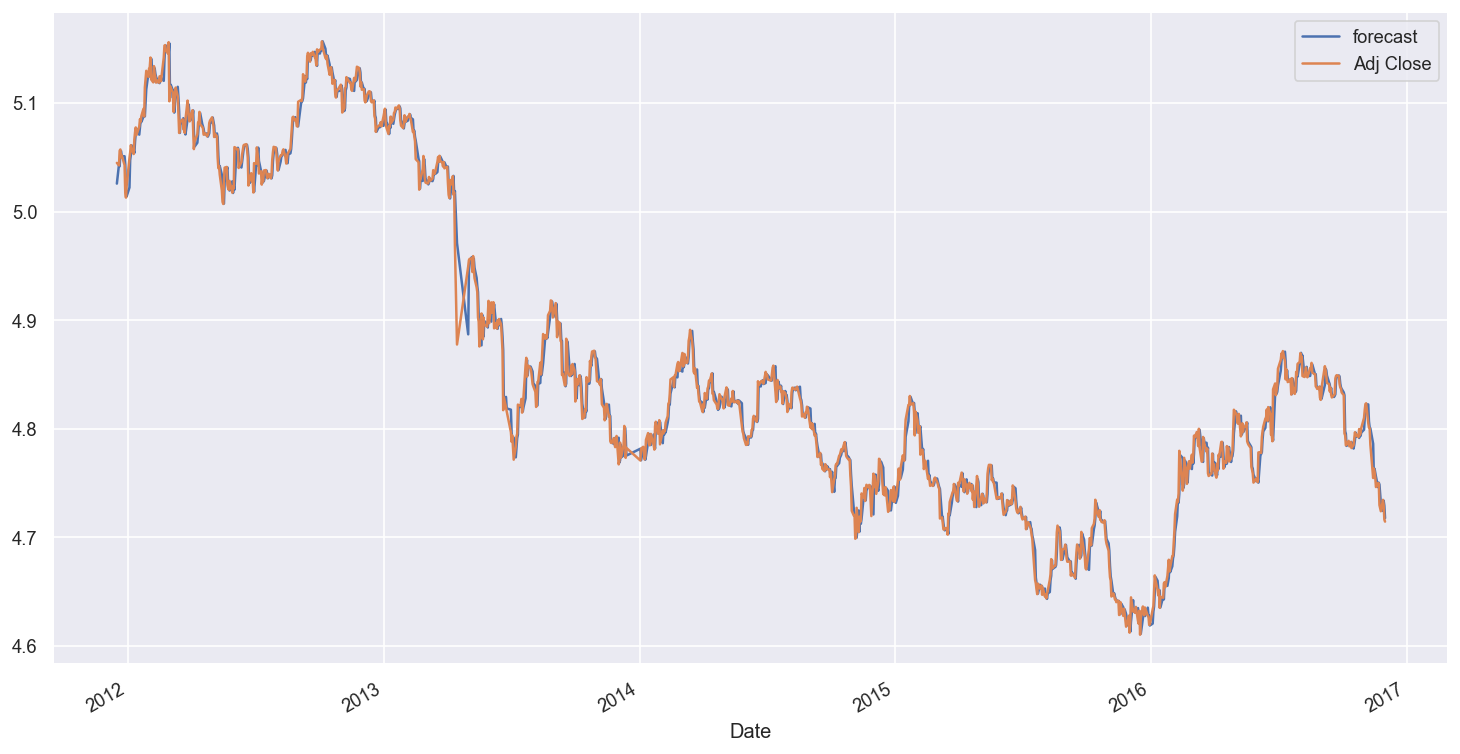

In [87]:
# Reel vs Ajusté
model_fit.plot_predict(dynamic=False)
plt.show()

### Prévision et visualisation

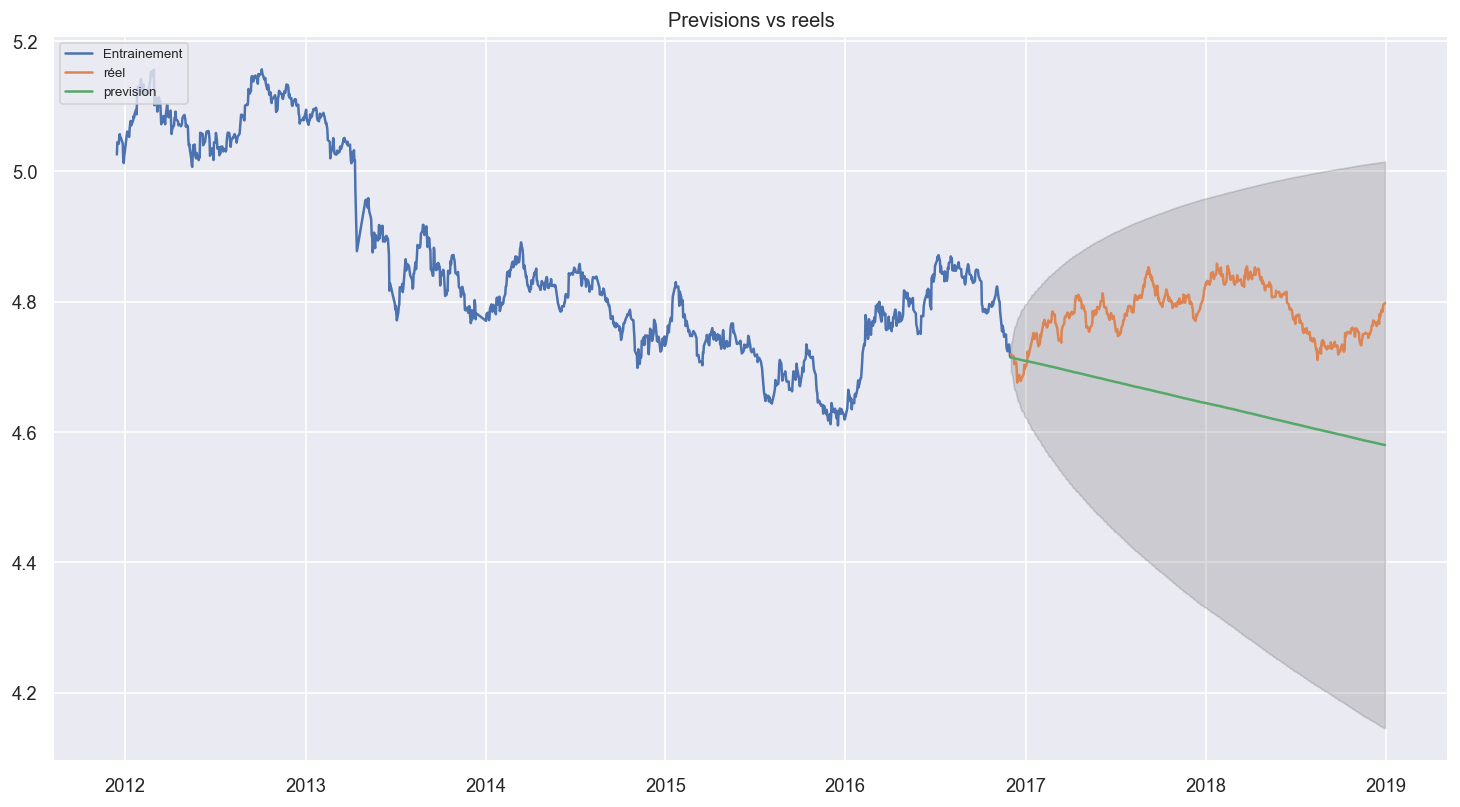

In [90]:
# Prevision
fc, se, conf = model_fit.forecast(516, alpha=0.05)  # 95% conf

# Fabriquer des pandas series
fc_series = pd.Series(fc, index=y_test.index)
lower_series = pd.Series(conf[:, 0], index=y_test.index)
upper_series = pd.Series(conf[:, 1], index=y_test.index)

# Plot
plt.figure(figsize=(15,8), dpi=120)
plt.plot(y_train, label='Entrainement')
plt.plot(y_test, label='réel')
plt.plot(fc_series, label='prevision')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Previsions vs reels')
plt.legend(loc='upper left', fontsize=8)
plt.show()

D'après le graphique, les valeurs réelles observées se situent dans la bande de confiance de 95%, mais chacune des prévisions prévues est systématiquement inférieure aux chiffres réels. Les prédictions ne semble pas etre significative. Il nous convient d'optimiser les paramètres de notre modèle dans le but de trouver de meilleurs resultats.

Nous utiliserons la fonction "auto_arima" qui nous fournira les meilleurs paramètres pour notre modèle ARIMA. La fonction cherche à identifier les paramètres les plus optimaux pour un modèle ARIMA et renvoie un modèle ARIMA ajusté.  

La fonction auro_arima fonctionne en effectuant des tests de différenciation (c.-à-d. Kwiatkowski-Phillips-Schmidt-Shin, Augmented Dickey-Fuller ou Phillips-Perron) pour déterminer l’ordre de différenciation, "d", puis en ajustant les modèles dans des plages start_p, max_p, start_q max_q définies. 
Si l’option saisonnière est activée, auto_arima cherche également à identifier les hyper- paramètres P et Q optimaux après avoir conduit le Canova-Hansen pour déterminer l’ordre optimal de différenciation saisonnière, "D".

In [95]:
from pmdarima.arima import auto_arima

In [96]:
model_autoARIMA = auto_arima(y_train, start_p=0, start_q=0,
                      test='adf',       # utilise adftest pour trouver l'ordre de différentiation 'd' optimal
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7473.244, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7476.997, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7477.466, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7474.545, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7476.263, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7476.941, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7477.562, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7476.617, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-7476.714, Time=0.53 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-7475.882, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7476.409, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-7475.133, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-7478.759, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-7478.037, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0

Les p-values des termes AR et MA sont inférieurs à 0.05 ce qui implique que les termes AR1, MA1 et MA2 sont significatives. Et le critère de sélection AIC du modèle ARIMA (1,1,2) est le plus petit. Cela signifie que ce modèle est le plus efficace.

### Examinons les tracés résiduelles

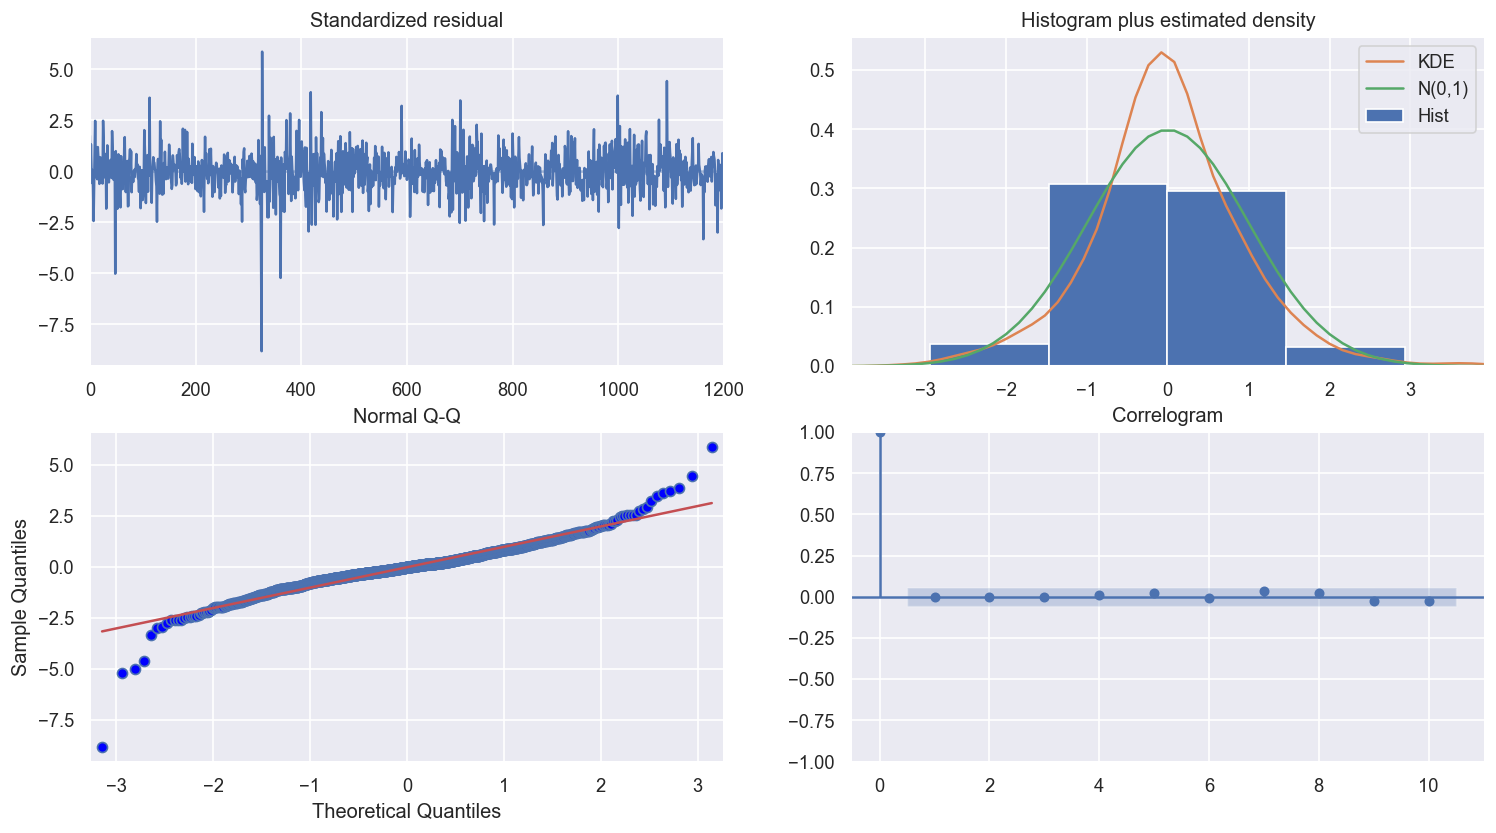

In [97]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

<ul>
<li><strong>En haut à gauche :</strong> Les erreurs résiduelles semblent fluctuer autour d’une moyenne de zéro et ont une variance uniforme.</li>
<li><strong>En haut à droite :</strong> La distribution est normale avec une moyenne de zéro, ce qui est suggérer par le diagramme de densité.</li> 
<li> <strong>En bas à gauche : </strong>On remarque ici que la majorité des points sont parfaitement alignés sur la ligne rouge. Mais il existe des points qui s'écartent dsignificativement de la ligne ce qui peut entrainer une distribution faussée.</li>   
<li><strong>En bas à droite :</strong>Le diagramme ACF Correlogram, aka, montre que les erreurs résiduelles ne sont pas autocorrées. Toute autocorrélation impliquerait qu’il existe un certain modèle dans les erreurs résiduelles qui ne sont pas expliquées dans le modèle.</li>    
</ul>    

Dans l’ensemble, cela semble être un bon ajustement. Faisons des prévisions.

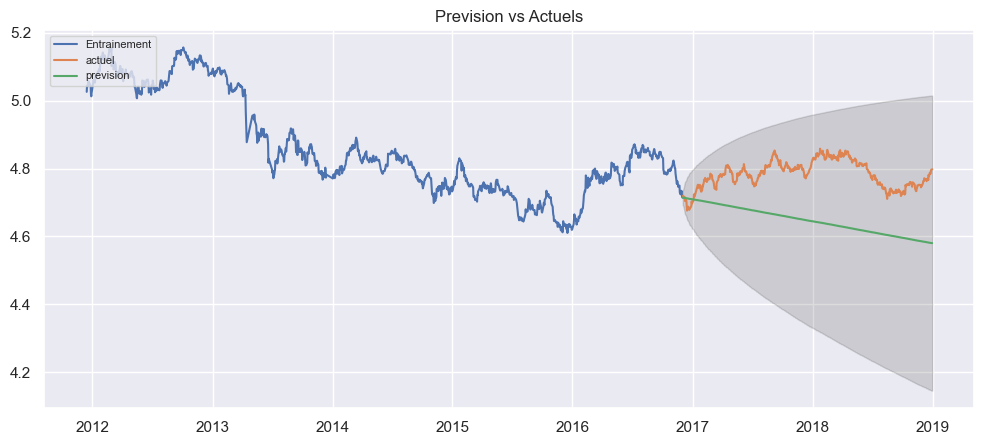

In [101]:
## PREVISION


#model = ARIMA(train, order=(1,1,2))  
model = ARIMA(y_train, order=(1, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(516, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=y_test.index)
lower_series = pd.Series(conf[:, 0], index=y_test.index)
upper_series = pd.Series(conf[:, 1], index=y_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(y_train, label='Entrainement')
plt.plot(y_test, label='actuel')
plt.plot(fc_series, label='prevision')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Prevision vs Actuels')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Mesure de prévisions

In [106]:
mse = mean_squared_error(y_test, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_test, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_test, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - y_test)/np.abs(y_test))
print('MAPE: '+str(mape))

MSE: 0.021706621212052284
MAE: 0.13706335140416084
RMSE: 0.1473316707705858
MAPE: 0.028591189465647492


Environ 2,85% MAPE implique que le modèle est précis à environ 97,15% dans la prédiction des observations de test.

## MODELE SARIMA

Le problème avec le modèle ARIMA simple est qu’il ne prend pas en charge la saisonnalité.

Ici notre série chronologique défini une saisonnalité, observons donc les résultats du modèle SARIMA sur notre serie. Le modèle SARIMA utilise la différenciation saisonnière. En plus des paramètres du modèle ARIMA, le modèle SARIMA ajoute les paramètres suivants : P ordre du SAR, Q ordre du SMA et D différentiation saisonnière.

### Différence entre différentiation saisonnière et différerentiation usuel

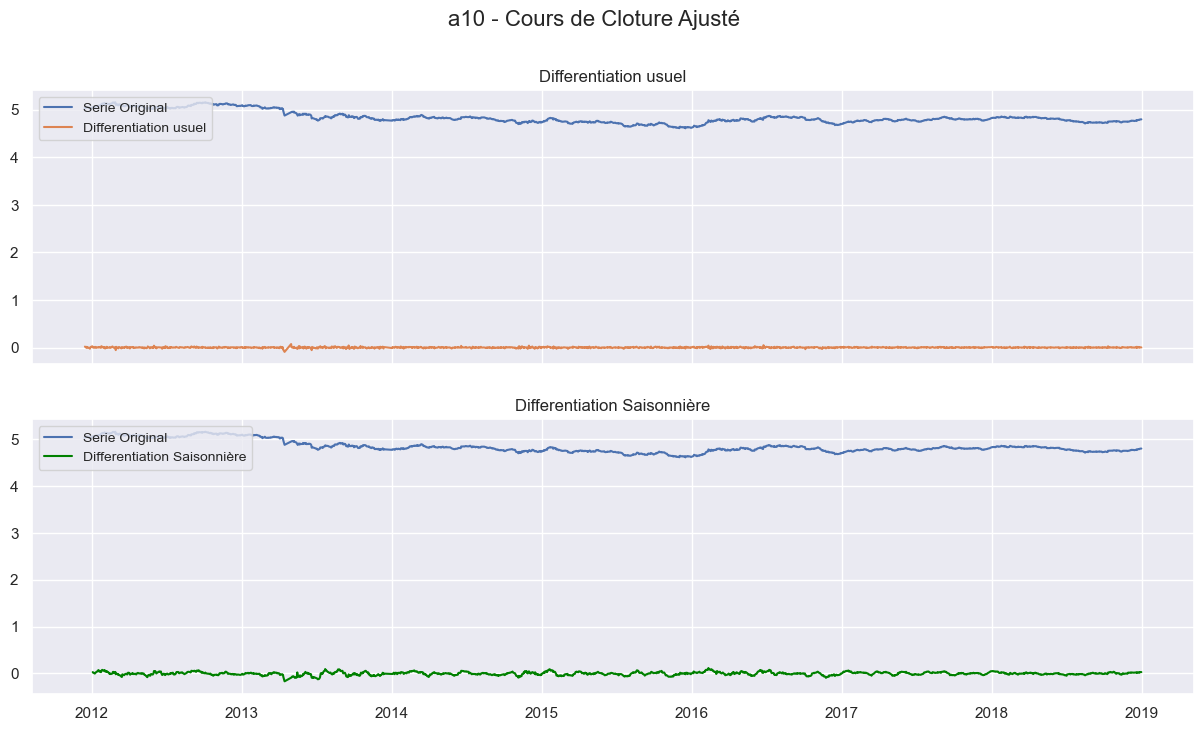

In [114]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(15,8), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(y_log, label='Serie Original')
axes[0].plot(y_log.diff(1), label='Differentiation usuel')
axes[0].set_title('Differentiation usuel')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(y_log, label='Serie Original')
axes[1].plot(y_log.diff(12), label='Differentiation Saisonnière', color='green')
axes[1].set_title('Differentiation Saisonnière')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Cours de Cloture Ajusté', fontsize=16)
plt.show()

On remarque une rectification des pics après différentiation saisonnière.

### Appliquons le modèle SARIMA

In [117]:
model_autoSARIMA = auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # utilise adftest pour trouver l'ordre de différentiation 'd' optimal
                      max_p=3, max_q=3, # maximum p et q
                      m=12,              # frequence de notre serie
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonalité
                      start_P=0,        
                      D=1,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoSARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-7191.072, Time=3.06 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-4592.671, Time=0.28 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-6932.888, Time=2.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-5613.785, Time=2.67 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-4585.838, Time=0.09 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-6635.864, Time=0.42 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=4.90 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=10.79 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-6935.313, Time=3.74 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=12.53 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-7148.022, Time=1.49 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.49 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-7217.643, Time=5.92 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-6636.464, Time=0.71 sec
 ARIMA(1,0,2)(1,1,1)[12] in

Le modèle SARIMA qui obtient le plus petit AIC est sélectionné (SARIMA(1,0,2)x(0,1,1,12)). Et ce modèle à des termes statistiquement significatives, car les p-values pour chaque terme sont inférieures à 0.05 .

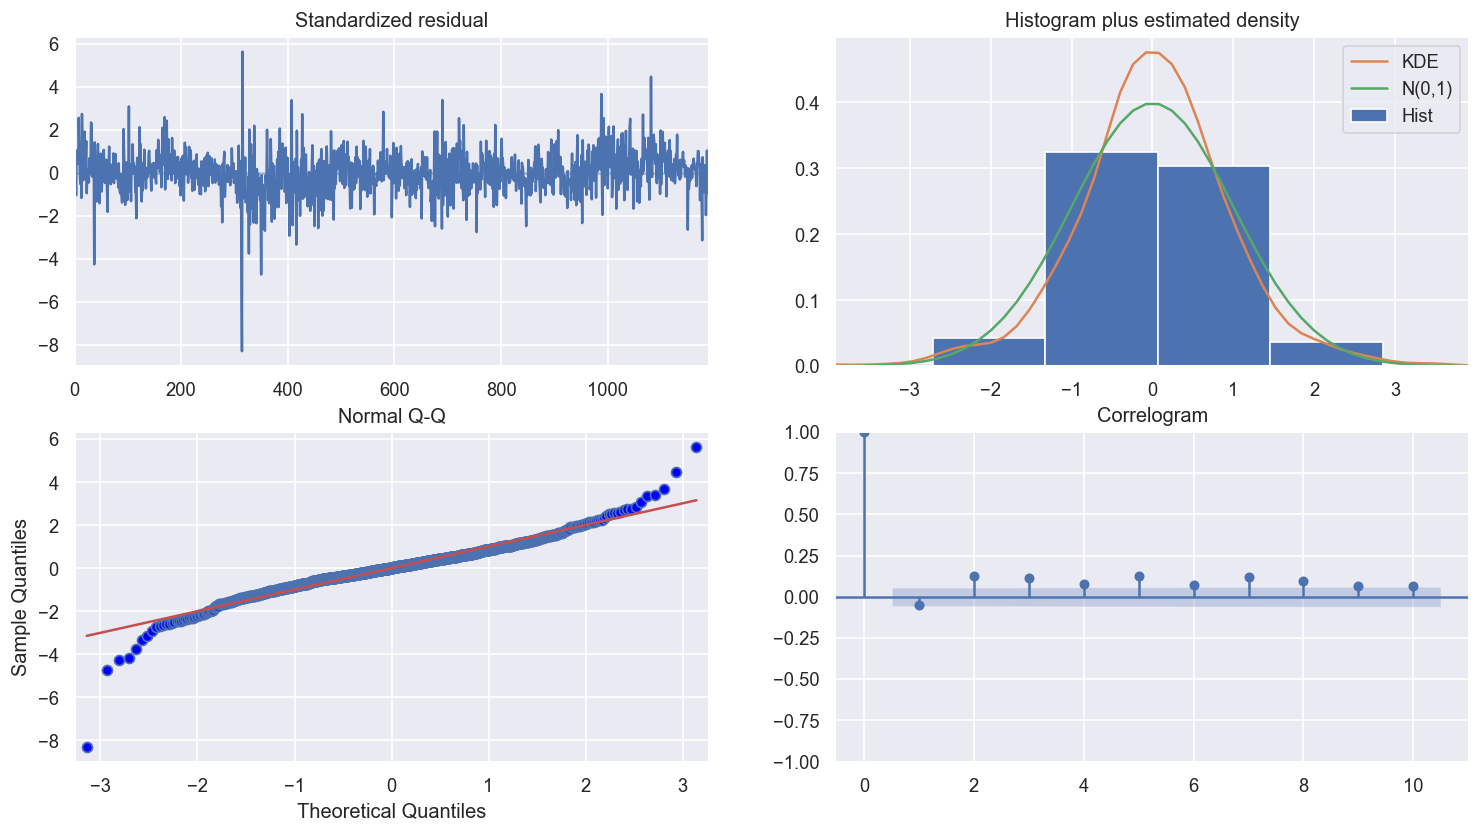

In [118]:
model_autoSARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

### Prevision 

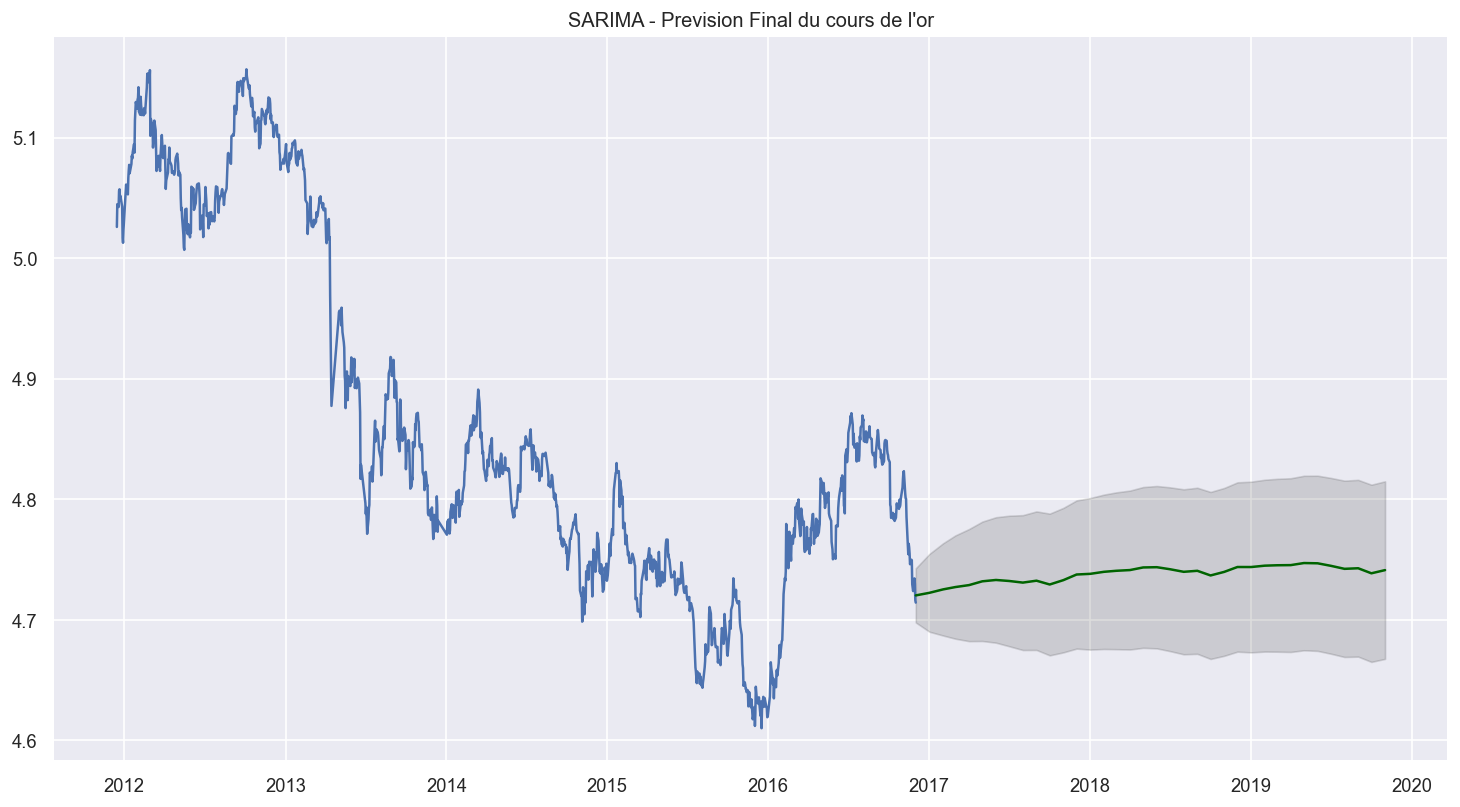

In [131]:
## PREVISION


# Prevision
fitted, confint = model_autoSARIMA.predict(n_periods=36, X=y_test, alpha=0.05, return_conf_int=True)  # 95% conf
index_of_fc = pd.date_range(y_train.index[-1], periods = 36, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(y_train)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Prevision Final du cours de l'or")
plt.show()


Nous obtenons les prévisions pour les trois prochaines années (36 mois) dans le graphique ci dessus.